In [1]:
# import dependencies
import pandas as pd
import nltk

# will need to uncomment the following the first time you run
# nltk.download('punkt')

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
r_cols = ["user id", "item id", "rating", "timestamp"]
ratings = pd.read_csv('../ml-100k/u.data', sep='\t', names=r_cols,encoding='latin-1')
ratings.head()

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
u_cols = ["user id", "age", "gender", "occupation", "zip code"]
users = pd.read_csv('../ml-100k/u.user', sep='|', names=u_cols,encoding='latin-1')
users.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [4]:
# merge movies and ratings
df = pd.merge(ratings, users, on="user id")
df.sort_values("user id").head()

,user id,item id,rating,timestamp,age,gender,occupation,zip code
20397,1,61,4,878542420,24,M,technician,85711
20558,1,270,5,888732827,24,M,technician,85711
20557,1,40,3,876893230,24,M,technician,85711
20556,1,211,3,878541970,24,M,technician,85711
20555,1,141,3,878542608,24,M,technician,85711


In [5]:
df["occupation"].describe()

count      100000
unique         21
top       student
freq        21957
Name: occupation, dtype: object

In [6]:
i_cols = ["item id", "movie title", "release date", "video release date", "IMDB URL", "unknown", "action", "adventure", "animation", "children's", "comedy", "crime", "documentary", "drama", "fantasy", "film-noir", "horror", "musical", "mystery", "romance", "sci-fi", "thriller", "war", "western"]
items = pd.read_csv('../ml-100k/u.item', sep='|', names=i_cols,encoding='latin-1')
items.head()

,item id,movie title,release date,video release date,IMDB URL,unknown,action,adventure,animation,children's,...,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
items.drop(['IMDB URL'],axis=1, inplace=True)
items.drop(['release date'],axis=1, inplace=True)
items.drop(['video release date'],axis=1, inplace=True)
items.head()

,item id,movie title,unknown,action,adventure,animation,children's,comedy,crime,documentary,...,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
# merge movies and ratings
df = pd.merge(df, items, on="item id")
df.sort_values("user id").head()

,user id,item id,rating,timestamp,age,gender,occupation,zip code,movie title,unknown,...,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
30897,1,161,4,875072303,24,M,technician,85711,Top Gun (1986),0,...,0,0,0,0,0,1,0,0,0,0
30527,1,144,4,875073180,24,M,technician,85711,Die Hard (1988),0,...,0,0,0,0,0,0,0,1,0,0
82356,1,41,2,876892818,24,M,technician,85711,Billy Madison (1995),0,...,0,0,0,0,0,0,0,0,0,0
5247,1,13,5,875071805,24,M,technician,85711,Mighty Aphrodite (1995),0,...,0,0,0,0,0,0,0,0,0,0
24073,1,208,5,878542960,24,M,technician,85711,Young Frankenstein (1974),0,...,0,0,1,0,0,0,0,0,0,0


In [9]:
# One Hot Encoding
gender = pd.get_dummies(users["gender"])
occupation = pd.get_dummies(users["occupation"])


# merge back to original df
df = pd.concat([df,gender,occupation], axis=1)

# 
df.head()

,user id,item id,rating,timestamp,age,gender,occupation,zip code,movie title,unknown,...,marketing,none,other,programmer,retired,salesman,scientist,student,technician,writer
0,196,242,3,881250949,49,M,writer,55105,Kolya (1996),0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,305,242,5,886307828,23,M,programmer,94086,Kolya (1996),0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,242,4,883268170,42,M,executive,98101,Kolya (1996),0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,234,242,4,891033261,60,M,retired,94702,Kolya (1996),0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,63,242,3,875747190,31,M,marketing,75240,Kolya (1996),0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# df['year'] = df['title'].str.extract('.*\((.*)\).*')
# df.head()

In [11]:
# # prep the year column to convert to int
# df = df.replace(to_replace='2006–2007', value='2007')
# df = df.fillna(0)
# df.head()

In [12]:
# # split the genres out from the pipe delimeters and extract year from title into new column
# df['genres'] = df['genres'].str.lower()
# df['genres'] = df['genres'].str.split("|")

In [13]:
# df['genres']=[" ".join(word) for word in df['genres'].values]

In [14]:
# v = TfidfVectorizer()
# x = v.fit_transform(df['genres'])
# df['genresVect'] = list(x.toarray())
# df.head()

In [15]:
# use drop to get features
data = df.drop(['gender', 'movie title', 'timestamp', 'occupation', 'zip code'],axis=1, inplace=True)

In [16]:
data = df.apply(pd.to_numeric) 
data = df.fillna(value=5)

# convert to int
# df['rating'] = df['rating'].astype(int) 
target = df["rating"]

In [17]:
data.drop(["rating"],axis=1, inplace=True)

In [18]:
# data = df[["userId", "movieId", "year", "genresVect"]]
data = data
feature_names = data.columns
data.head()

,user id,item id,age,unknown,action,adventure,animation,children's,comedy,crime,...,marketing,none,other,programmer,retired,salesman,scientist,student,technician,writer
0,196,242,49,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,305,242,23,0,0,0,0,0,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,242,42,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,234,242,60,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,63,242,31,0,0,0,0,0,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [20]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.33856

In [21]:
importances = rf.feature_importances_
importances

array([4.37036914e-01, 2.27062406e-01, 2.68647072e-01, 4.69929396e-05,
       5.34322370e-03, 4.24217815e-03, 1.51215524e-03, 2.72096122e-03,
       5.39520588e-03, 4.13225490e-03, 7.41245440e-04, 5.45674039e-03,
       1.14929738e-03, 1.19881220e-03, 2.81673791e-03, 3.16994414e-03,
       3.10041505e-03, 6.71085506e-03, 4.74851653e-03, 6.38527044e-03,
       3.61002881e-03, 1.48080108e-03, 2.31640624e-04, 2.20594798e-04,
       2.03982840e-04, 1.06691775e-04, 4.49143017e-05, 2.02444179e-04,
       1.72630897e-04, 8.21045648e-05, 1.12064546e-04, 8.28084282e-05,
       4.37892206e-05, 1.19511945e-04, 1.64891401e-04, 1.19818675e-04,
       6.32437803e-05, 2.52813312e-04, 1.83359211e-04, 9.52542103e-05,
       8.02249254e-05, 1.29821666e-04, 2.98443513e-04, 1.20072278e-04,
       1.60850136e-04])

In [22]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.43703691404054346, 'user id'),
 (0.2686470722962682, 'age'),
 (0.2270624059756814, 'item id'),
 (0.006710855061907479, 'romance'),
 (0.0063852704423784, 'thriller'),
 (0.005456740391022742, 'drama'),
 (0.005395205883821979, 'comedy'),
 (0.005343223695774088, 'action'),
 (0.0047485165299029596, 'sci-fi'),
 (0.004242178153621094, 'adventure'),
 (0.004132254895488787, 'crime'),
 (0.003610028811257998, 'war'),
 (0.003169944135709687, 'musical'),
 (0.003100415053192801, 'mystery'),
 (0.0028167379134544594, 'horror'),
 (0.0027209612161091497, "children's"),
 (0.0015121552368814433, 'animation'),
 (0.001480801082125263, 'western'),
 (0.0011988122001861167, 'film-noir'),
 (0.0011492973789879184, 'fantasy'),
 (0.0007412454404916366, 'documentary'),
 (0.00029844351276536057, 'student'),
 (0.00025281331174473713, 'other'),
 (0.0002316406238814527, 'F'),
 (0.00022059479759865643, 'M'),
 (0.00020398283978938312, 'administrator'),
 (0.00020244417905092453, 'educator'),
 (0.00018335921109116654, 

No handles with labels found to put in legend.


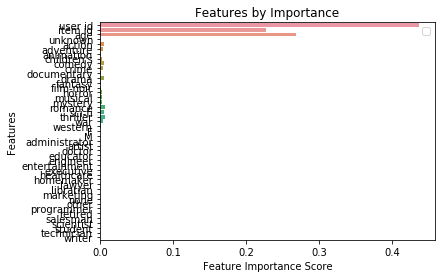

In [23]:
sns.barplot(x=importances, y=feature_names)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Features by Importance")
plt.legend()
plt.show()